In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/mobile_sales_data.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(file_path)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  50000 non-null  object
 1   Brand                    50000 non-null  object
 2   Product Code             50000 non-null  object
 3   Product Specification    50000 non-null  object
 4   Price                    50000 non-null  int64 
 5   Inward Date              50000 non-null  object
 6   Dispatch Date            50000 non-null  object
 7   Quantity Sold            50000 non-null  int64 
 8   Customer Name            50000 non-null  object
 9   Customer Location        50000 non-null  object
 10  Region                   50000 non-null  object
 11  Core Specification       25017 non-null  object
 12  Processor Specification  50000 non-null  object
 13  RAM                      50000 non-null  object
 14  ROM                      50000 non-nul

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [ ]:
print("Jumlah nilai hilang per kolom sebelum penanganan:")
print(df.isnull().sum())

Jumlah nilai hilang per kolom sebelum penanganan:
Product                        0
Brand                          0
Product Code                   0
Product Specification          0
Price                          0
Inward Date                    0
Dispatch Date                  0
Quantity Sold                  0
Customer Name                  0
Customer Location              0
Region                         0
Core Specification         24983
Processor Specification        0
RAM                            0
ROM                            0
SSD                        24983
dtype: int64


In [ ]:
print("\nNilai unik di kolom SSD sebelum penanganan:")
print(df['SSD'].unique())
df['SSD'] = df['SSD'].replace('nan', '0 GB')


Nilai unik di kolom SSD sebelum penanganan:
[nan '256GB' '2TB' '1TB' '512GB']


In [ ]:
df['Inward Date'] = pd.to_datetime(df['Inward Date'])
df['Dispatch Date'] = pd.to_datetime(df['Dispatch Date'])
print("\nTipe data setelah konversi tanggal:")
df.info()


Tipe data setelah konversi tanggal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product                  50000 non-null  object        
 1   Brand                    50000 non-null  object        
 2   Product Code             50000 non-null  object        
 3   Product Specification    50000 non-null  object        
 4   Price                    50000 non-null  int64         
 5   Inward Date              50000 non-null  datetime64[ns]
 6   Dispatch Date            50000 non-null  datetime64[ns]
 7   Quantity Sold            50000 non-null  int64         
 8   Customer Name            50000 non-null  object        
 9   Customer Location        50000 non-null  object        
 10  Region                   50000 non-null  object        
 11  Core Specification       25017 non-null  object        


In [ ]:
print("\n--- Membersihkan dan mengekstrak nilai numerik dari RAM, ROM, SSD ---")

def extract_numeric_storage(value):
    if pd.isna(value): # Menangani NaN secara langsung
        return 0
    value_str = str(value).upper().replace(' ', '')
    if 'TB' in value_str:
        numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', value_str.replace('TB', '')))
        if numeric_part:
            return int(float(numeric_part) * 1024) # Konversi TB ke GB
        else:
            return 0
    elif 'GB' in value_str:
        numeric_part = ''.join(filter(lambda x: x.isdigit() or x == '.', value_str.replace('GB', '')))
        if numeric_part:
            return int(float(numeric_part))
        else:
            return 0
    try:
        return int(float(value_str)) # Jika hanya angka
    except ValueError:
        return 0 # Default jika tidak bisa di-parse


df['RAM_GB'] = df['RAM'].apply(extract_numeric_storage)
df['ROM_GB'] = df['ROM'].apply(extract_numeric_storage)
df['SSD_GB'] = df['SSD'].apply(extract_numeric_storage)

print("Contoh hasil ekstraksi RAM, ROM, SSD:")
print(df[['RAM', 'RAM_GB', 'ROM', 'ROM_GB', 'SSD', 'SSD_GB']].head())
print("\nNilai unik di RAM_GB:", df['RAM_GB'].unique())
print("Nilai unik di ROM_GB:", df['ROM_GB'].unique())
print("Nilai unik di SSD_GB:", df['SSD_GB'].unique())


--- Membersihkan dan mengekstrak nilai numerik dari RAM, ROM, SSD ---
Contoh hasil ekstraksi RAM, ROM, SSD:
    RAM  RAM_GB    ROM  ROM_GB    SSD  SSD_GB
0  12GB      12  128GB     128    NaN       0
1   8GB       8  512GB     512  256GB     256
2   8GB       8  256GB     256    NaN       0
3  12GB      12   64GB      64    2TB    2048
4   8GB       8  128GB     128    2TB    2048

Nilai unik di RAM_GB: [12  8 16  6  4 32]
Nilai unik di ROM_GB: [ 128  512  256   64 1024]
Nilai unik di SSD_GB: [   0  256 2048 1024  512]


In [ ]:
df['Revenue'] = df['Price'] * df['Quantity Sold']
print("Kolom 'Revenue' berhasil dibuat.")
print(df[['Price', 'Quantity Sold', 'Revenue']].head())
df['DaysInStock'] = (df['Dispatch Date'] - df['Inward Date']).dt.days
print("\nKolom 'DaysInStock' berhasil dibuat.")
negative_days_in_stock = df[df['DaysInStock'] < 0]
if not negative_days_in_stock.empty:
    print(f"\nPeringatan: Ditemukan {len(negative_days_in_stock)} baris dengan 'DaysInStock' negatif.")
    print("Contoh baris dengan DaysInStock negatif:")
    print(negative_days_in_stock[['Inward Date', 'Dispatch Date', 'DaysInStock']].head())

    df.loc[df['DaysInStock'] < 0, 'DaysInStock'] = 0
    print("Nilai 'DaysInStock' yang negatif telah diubah menjadi 0.")

else:
    print("Tidak ada nilai 'DaysInStock' yang negatif.")

print(df[['Inward Date', 'Dispatch Date', 'DaysInStock']].head())

print("\nNilai unik di kolom 'Product':")
print(df['Product'].unique())

product_to_filter = 'Mobile Phone'
if product_to_filter in df['Product'].unique():
    df_mobile = df[df['Product'] == product_to_filter].copy()
    print(f"\nDataset berhasil difilter untuk '{product_to_filter}'.")
    print(f"Jumlah baris di df_mobile: {len(df_mobile)}")
    print(df_mobile[['Product', 'Brand', 'Price', 'Revenue']].head())

else:
    print(f"\nProduk '{product_to_filter}' tidak ditemukan di kolom 'Product'. Tidak ada filter yang diterapkan.")
    df_mobile = df.copy() #

Kolom 'Revenue' berhasil dibuat.
    Price  Quantity Sold  Revenue
0   78570              6   471420
1   44613              1    44613
2  159826              5   799130
3   20911              1    20911
4   69832              4   279328

Kolom 'DaysInStock' berhasil dibuat.
Tidak ada nilai 'DaysInStock' yang negatif.
  Inward Date Dispatch Date  DaysInStock
0  2023-08-02    2023-08-03            1
1  2023-10-03    2023-10-06            3
2  2025-03-19    2025-03-20            1
3  2024-02-06    2024-03-27           50
4  2023-08-10    2023-09-10           31

Nilai unik di kolom 'Product':
['Mobile Phone' 'Laptop']

Dataset berhasil difilter untuk 'Mobile Phone'.
Jumlah baris di df_mobile: 24983
         Product     Brand   Price  Revenue
0   Mobile Phone  Motorola   78570   471420
2   Mobile Phone   Samsung  159826   799130
6   Mobile Phone      Dell   11670    70020
9   Mobile Phone  Motorola  174698  1746980
10  Mobile Phone     Apple   51251   461259



Analisis akan menggunakan DataFrame ('current_df_for_analysis') dengan 24983 baris.
Beberapa baris pertama dari 'current_df_for_analysis':
         Product     Brand Product Code  \
0   Mobile Phone  Motorola     88EB4558   
2   Mobile Phone   Samsung     9F975B08   
6   Mobile Phone      Dell     14932CAE   
9   Mobile Phone  Motorola     E3CF42BE   
10  Mobile Phone     Apple     F54013D6   

                                Product Specification   Price Inward Date  \
0   Site candidate activity company there bit insi...   78570  2023-08-02   
2            Energy special low seven place audience.  159826  2025-03-19   
6   Could before almost wind couple evening perfor...   11670  2023-10-10   
9   Responsibility form left final suffer party pi...  174698  2025-02-09   
10                       To say system loss near him.   51251  2023-04-03   

   Dispatch Date  Quantity Sold       Customer Name Customer Location  ...  \
0     2023-08-03              6        William Hess      Sou

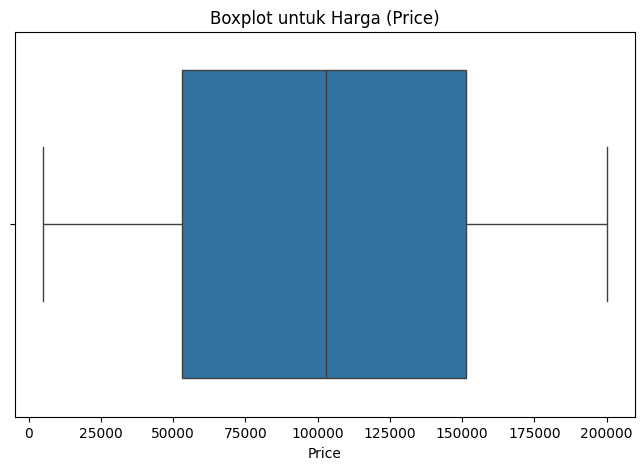

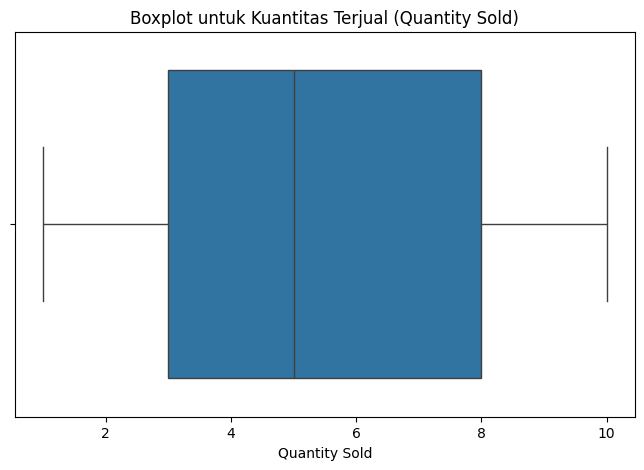

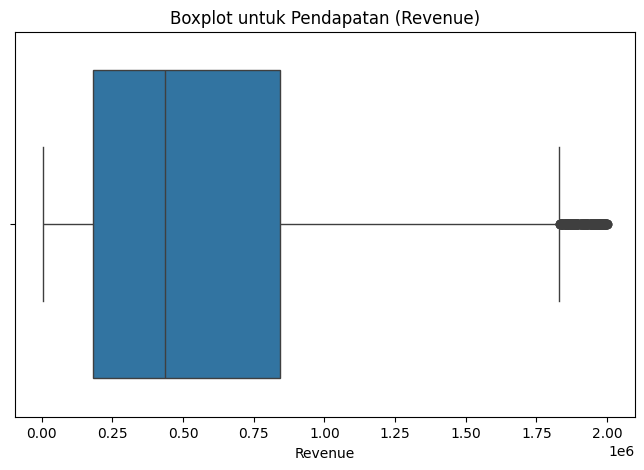

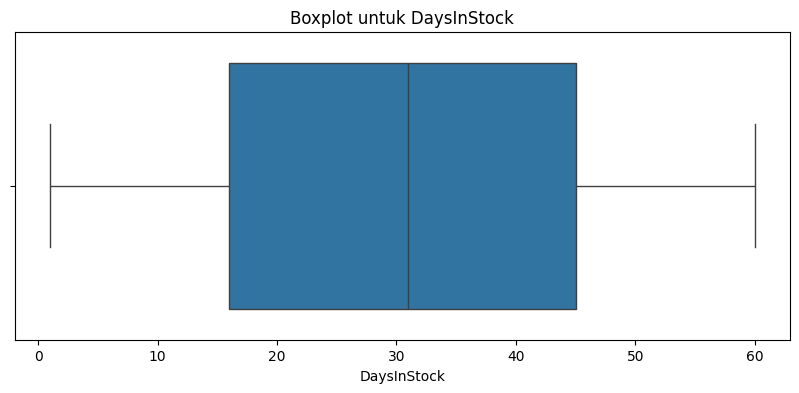

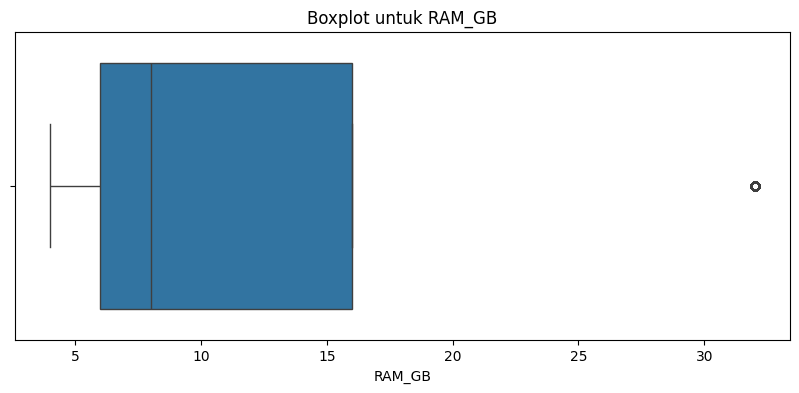

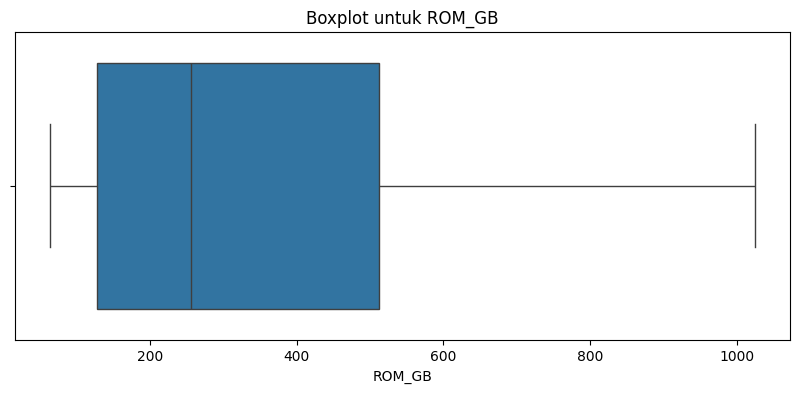

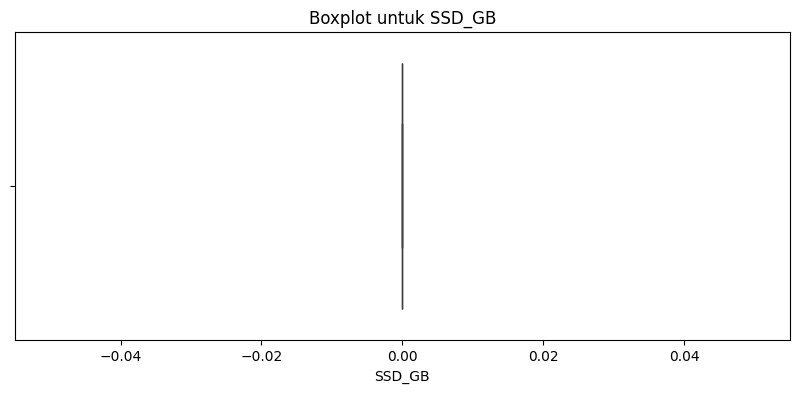

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
current_df_for_analysis = df_mobile
print(f"\nAnalisis akan menggunakan DataFrame ('current_df_for_analysis') dengan {len(current_df_for_analysis)} baris.")
print("Beberapa baris pertama dari 'current_df_for_analysis':")
print(current_df_for_analysis.head())
print("\n--- Identifikasi Outlier menggunakan Boxplot ---")

# Cek outlier pada 'Price'
plt.figure(figsize=(8, 5))
sns.boxplot(x=current_df_for_analysis['Price']) # Ganti current_df_for_analysis dengan df jika tidak filter
plt.title('Boxplot untuk Harga (Price)')
plt.show()

# Cek outlier pada 'Quantity Sold'
plt.figure(figsize=(8, 5))
sns.boxplot(x=current_df_for_analysis['Quantity Sold'])
plt.title('Boxplot untuk Kuantitas Terjual (Quantity Sold)')
plt.show()

# Cek outlier pada 'Revenue'
plt.figure(figsize=(8, 5))
sns.boxplot(x=current_df_for_analysis['Revenue'])
plt.title('Boxplot untuk Pendapatan (Revenue)')
plt.show()

# Cek
columns_to_check_next = ['DaysInStock', 'RAM_GB', 'ROM_GB', 'SSD_GB']

for column in columns_to_check_next:
    if column in current_df_for_analysis.columns:
        plt.figure(figsize=(10, 4)) # Anda bisa menyesuaikan ukuran gambar
        sns.boxplot(x=current_df_for_analysis[column])
        plt.title(f'Boxplot untuk {column}')
        plt.show()
    else:
        print(f"Peringatan: Kolom '{column}' tidak ditemukan dalam DataFrame 'current_df_for_analysis'.")


In [ ]:
df_mobile_cleaned = df_mobile.drop(columns=['Product', 'Product Code', 'Customer Name', 'Product Specification'])

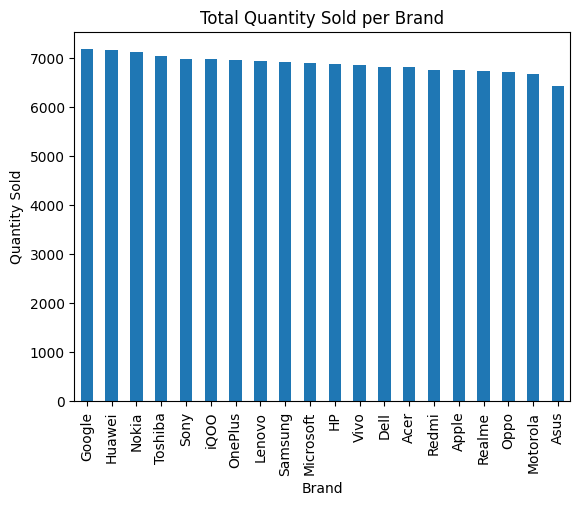

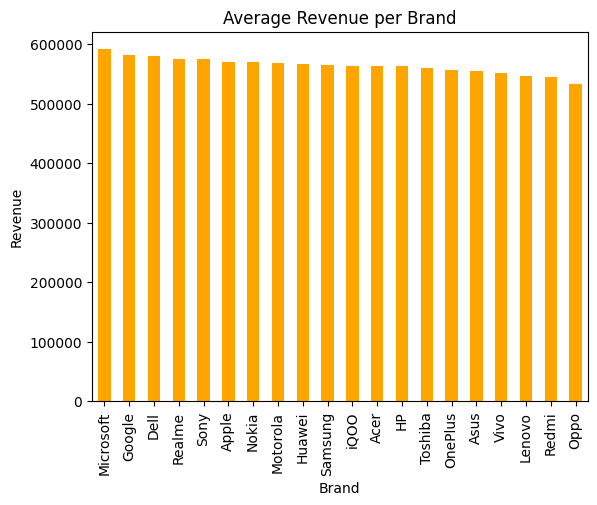

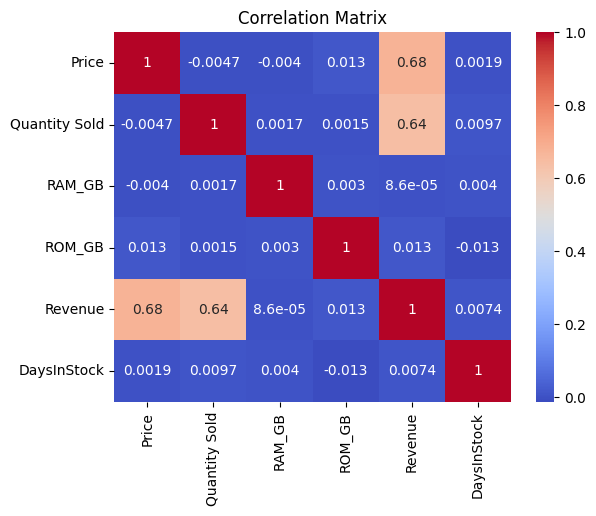

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Jumlah penjualan berdasarkan brand
brand_sales = df_mobile_cleaned.groupby('Brand')['Quantity Sold'].sum().sort_values(ascending=False)
brand_sales.plot(kind='bar', title='Total Quantity Sold per Brand')
plt.ylabel('Quantity Sold')
plt.show()

# 2. Rata-rata revenue per brand
brand_revenue = df_mobile_cleaned.groupby('Brand')['Revenue'].mean().sort_values(ascending=False)
brand_revenue.plot(kind='bar', color='orange', title='Average Revenue per Brand')
plt.ylabel('Revenue')
plt.show()

# 3. Korelasi antara fitur numerik
sns.heatmap(df_mobile_cleaned[['Price', 'Quantity Sold', 'RAM_GB', 'ROM_GB', 'Revenue', 'DaysInStock']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import scipy.stats as stats

grouped = df_mobile_cleaned.groupby('Processor Specification')['Revenue']
anova_test = stats.f_oneway(*[group for name, group in grouped])
print("F-statistic:", anova_test.statistic)
print("P-value:", anova_test.pvalue)


F-statistic: 1.1090700006025265
P-value: 0.35402634057603627


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Pisahkan fitur dan target
# X = df_mobile_cleaned[['Brand', 'Region', 'Processor Specification', 'RAM_GB', 'ROM_GB', 'Price']]
# y = df_mobile_cleaned['Revenue']

# # One-hot encoding untuk fitur kategorikal
# categorical_cols = ['Brand', 'Region', 'Processor Specification']
# numerical_cols = ['RAM_GB', 'ROM_GB', 'Price']

# preprocessor = ColumnTransformer([
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
# ], remainder='passthrough')

# model = Pipeline([
#     ('preprocessing', preprocessor),
#     ('regressor', RandomForestRegressor(random_state=42))
# ])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)

# # Lihat pentingnya fitur
# importances = model.named_steps['regressor'].feature_importances_
# feature_names = model.named_steps['preprocessing'].get_feature_names_out().tolist()
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feature_importance_df.sort_values('Importance', ascending=False).head(10)


In [ ]:
# Misal revenue dihitung manual
df['Revenue'] = df['Price'] * df['Quantity Sold']

# Pilih fitur dan target
X = df.drop(['Revenue', 'Customer Name', 'Product Code', 'Dispatch Date', 'Inward Date'], axis=1)
y = df['Revenue']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline prediksi
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)




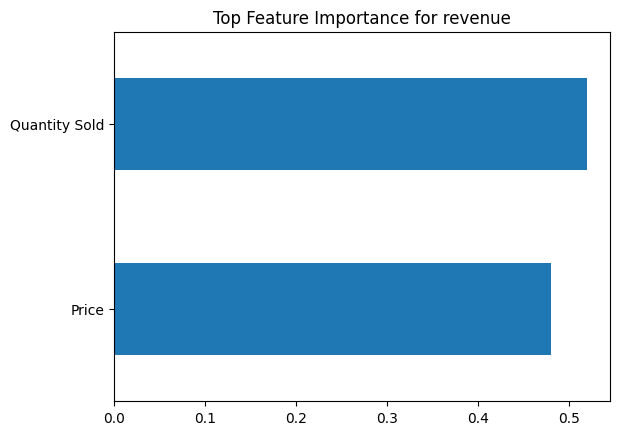

In [ ]:
import matplotlib.pyplot as plt

# Ambil nama kolom setelah transformasi
feature_names = model.named_steps['preprocessor'].transformers_[0][2].tolist() + \
                list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols))

importances = model.named_steps['regressor'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Visualisasi
feat_imp.head(2).plot(kind='barh')
plt.title('Top Feature Importance for revenue')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.9999996415897814
MAE: 177.7535100000004


In [ ]:
import pandas as pd

# Contoh 1 baris data baru
new_data = pd.DataFrame([{
    'Brand': 'Samsung',
    'Price': 159826,
    'RAM_GB': 8,
    'ROM_GB': 258,
    'SSD_GB': 0,
    'RAM': "8 GB",
    'ROM': "256 GB",
    'SSD': "0",
    'Region': 'Central',
    'Processor Specification': 'Snapdragon 8 Gen 1',
    'Core Specification': 'Mediatek Dimensity',
    'Product': 'Mobile Phone',
    'Customer Location': 'South Todd',
    'Product Specification': 'Mid-range Android phone',
    'DaysInStock': 1,
    'Quantity Sold': 5
}])


In [ ]:
for col in ['RAM_GB', 'ROM_GB', 'SSD_GB', 'Price', 'DaysInStock']:
    if col in new_data.columns:
        new_data[col] = pd.to_numeric(new_data[col], errors='coerce')
        new_data[col] = new_data[col].fillna(0)


In [ ]:
prediction = model.predict(new_data)
print(f"Hasil Prediksi: {prediction[0]:,.2f}")


Hasil Prediksi: 799,087.90
